In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm

In [51]:
spam = pd.read_csv('spam.csv')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [52]:
z = spam['v2']
y = spam['v1']
z_train, z_test,y_train, y_test = train_test_split(z,y,test_size = 0.2)

In [53]:
print(set(y_train))

{'spam', 'ham'}


In [54]:
cv = CountVectorizer()
features = cv.fit_transform(z_train)

In [55]:
model = svm.SVC()
model.fit(features,y_train)

SVC()

In [56]:
features_test = cv.transform(z_test)
print("Accuracy: {}".format(model.score(features_test,y_test)))

Accuracy: 0.9811659192825112


<Axes: >

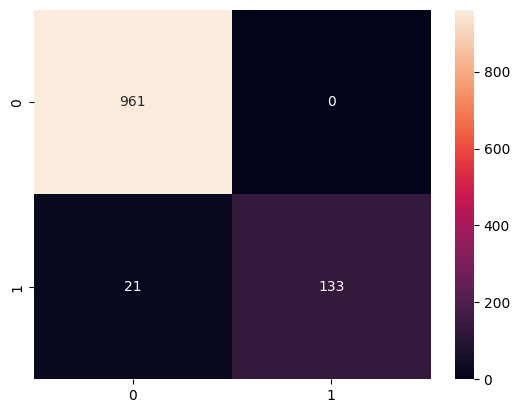

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = model.predict(features_test)
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, fmt="d")


In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_test_numeric = le.fit_transform(y_test)

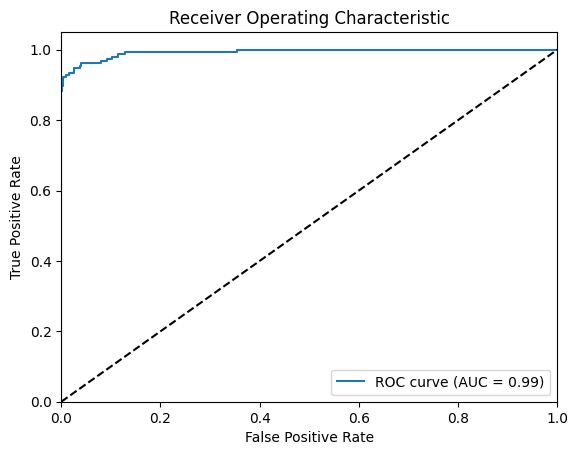

In [60]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

probas = model.decision_function(features_test)
fpr, tpr, thresholds = roc_curve(y_test_numeric, probas)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [65]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
import joblib
spam = pd.read_csv('spam.csv')
z = spam['v2']
y = spam['v1']

cv = CountVectorizer()
features = cv.fit_transform(z)
model = svm.SVC()
model.fit(features, y)
joblib.dump(model, 'model.pkl')
model = joblib.load('model.pkl')
input_mail = input("Enter your email text: ")
input_features = cv.transform([input_mail])
prediction = model.predict(input_features)

if prediction[0] == 'ham':
    print("This mail is not spam.")
else:
    print("This mail is spam.")


Enter your email text: Dear,  We are informing you that  your profile has been selected online.  We are informing you that your resume has been online selected in our annual direct selection of candidates in “ASHOK LEYLAND LIMITED”.     The Company offers you to join, as well as Company offers you to join as an Executive/Manager post in respective department. You are selected according to your resume in which Project you have worked and on the basis of your academic records.     Total Post - 38, Experience:0 to 10 Years  Location: New Delhi, Pune, Bangalore, Chandigarh, Mumbai & Other city.  Company Website-     (www.ashokleyland.com)   The Selected candidate keeps the right of being getting posted at the desired location subject to the final decision of HRD after discussion. Salary - Min –Rs.25, 000/- to Rs.1, 44,000/-+ incentives, per month on your performance .You are going to get employment in “ASHOK LEYLAND LIMITED”.         About “ASHOK LEYLAND LIMITED”: Existing over the years, 